# Grid Search Results Visualization

This notebook visualizes the results of grid search for the CMMA difference trader parameters. It helps identify optimal parameter combinations and understand the relationships between different parameters and their impact on performance.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Set plot style
plt.style.use('ggplot')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Set figure size for better visibility
plt.rcParams['figure.figsize'] = [12, 8]

# Display all columns
pd.set_option('display.max_columns', None)

## Load Grid Search Results

First, let's load the grid search results from the CSV file.

In [19]:
# Load the grid search results
# You can change the file path to the specific grid search results file you want to analyze
grid_search_file = 'cmma_grid_search_results3.csv'
results_df = pd.read_csv(grid_search_file)

# Display the first few rows to understand the structure
results_df.head()

,threshold,lookback,max_position,price_adjustment,2--1,2-0,2-1,total_profit
0,0.50,4000,30,1,53419,35407,8854,97680
1,0.50,3000,30,1,36446,33623,27337,97406
2,0.66,2200,30,1,32870,45190,16889,94949
3,0.66,2400,30,1,36313,38785,19780,94878
4,0.60,2600,30,1,31461,43429,17261,92151


In [20]:
# Get basic statistics about the results
results_df.describe()

,threshold,lookback,max_position,price_adjustment,2--1,2-0,2-1,total_profit
count,30.000000,30.000000,30.0,30.0,30.000000,30.000000,30.000000,30.000000
mean,0.642000,2950.000000,30.0,1.0,19160.600000,23148.633333,11353.266667,53662.500000
std,0.087824,642.597101,0.0,0.0,14882.058881,14551.118816,9157.391930,33951.642648
min,0.500000,2200.000000,30.0,1.0,0.000000,0.000000,52.000000,2533.000000
25%,0.600000,2400.000000,30.0,1.0,5459.500000,16168.250000,6210.750000,28578.250000
50%,0.660000,2800.000000,30.0,1.0,17478.000000,19995.000000,7239.500000,42909.000000
75%,0.700000,3500.000000,30.0,1.0,29668.500000,37063.750000,16227.750000,87519.250000
max,0.750000,4000.000000,30.0,1.0,53419.000000,45190.000000,36644.000000,97680.000000


In [21]:
# Check the unique values for each parameter
print("Unique threshold values:", sorted(results_df['threshold'].unique()))
print("Unique lookback values:", sorted(results_df['lookback'].unique()))
print("Unique max_position values:", sorted(results_df['max_position'].unique()))
print("Unique price_adjustment values:", sorted(results_df['price_adjustment'].unique()))

Unique threshold values: [0.5, 0.6, 0.66, 0.7, 0.75]
Unique lookback values: [2200, 2400, 2600, 3000, 3500, 4000]
Unique max_position values: [30]
Unique price_adjustment values: [1]


In [22]:
# Display the top 10 parameter combinations by total profit
results_df.sort_values('total_profit', ascending=False).head(10)

,threshold,lookback,max_position,price_adjustment,2--1,2-0,2-1,total_profit
0,0.50,4000,30,1,53419,35407,8854,97680
1,0.50,3000,30,1,36446,33623,27337,97406
2,0.66,2200,30,1,32870,45190,16889,94949
3,0.66,2400,30,1,36313,38785,19780,94878
4,0.60,2600,30,1,31461,43429,17261,92151
5,0.50,2400,30,1,29202,28263,33652,91117
6,0.50,2200,30,1,27435,24644,36644,88723
7,0.60,2200,30,1,38829,37616,11630,88075
8,0.70,2200,30,1,24100,40877,20875,85852
9,0.50,3500,30,1,43595,40019,52,83666


## Parameter Relationship Visualizations

Let's create various visualizations to understand the relationships between parameters and their impact on performance.

### 1. Heatmaps for Parameter Pairs

First, let's create heatmaps to visualize how pairs of parameters affect the total profit.

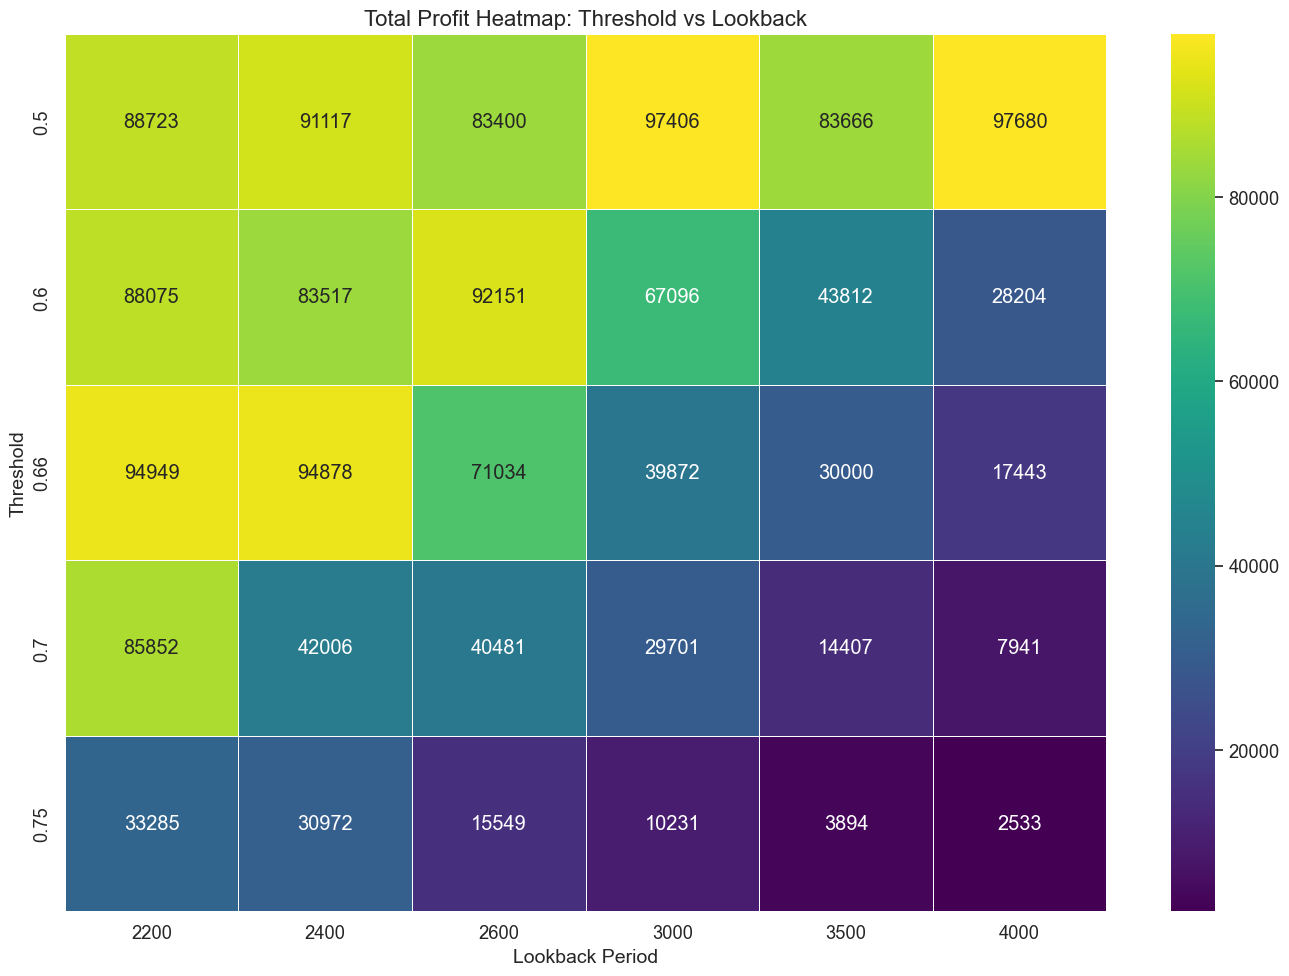

In [23]:
# Create a heatmap for threshold vs lookback
# Pivot the data to create a 2D grid of threshold vs lookback with total_profit as values
threshold_lookback_pivot = results_df.pivot_table(
    index='threshold', 
    columns='lookback', 
    values='total_profit',
    aggfunc='mean'  # Use mean if there are multiple entries with the same threshold and lookback
)

plt.figure(figsize=(14, 10))
sns.heatmap(threshold_lookback_pivot, annot=True, fmt='.0f', cmap='viridis', linewidths=0.5)
plt.title('Total Profit Heatmap: Threshold vs Lookback', fontsize=16)
plt.xlabel('Lookback Period', fontsize=14)
plt.ylabel('Threshold', fontsize=14)
plt.tight_layout()
plt.show()

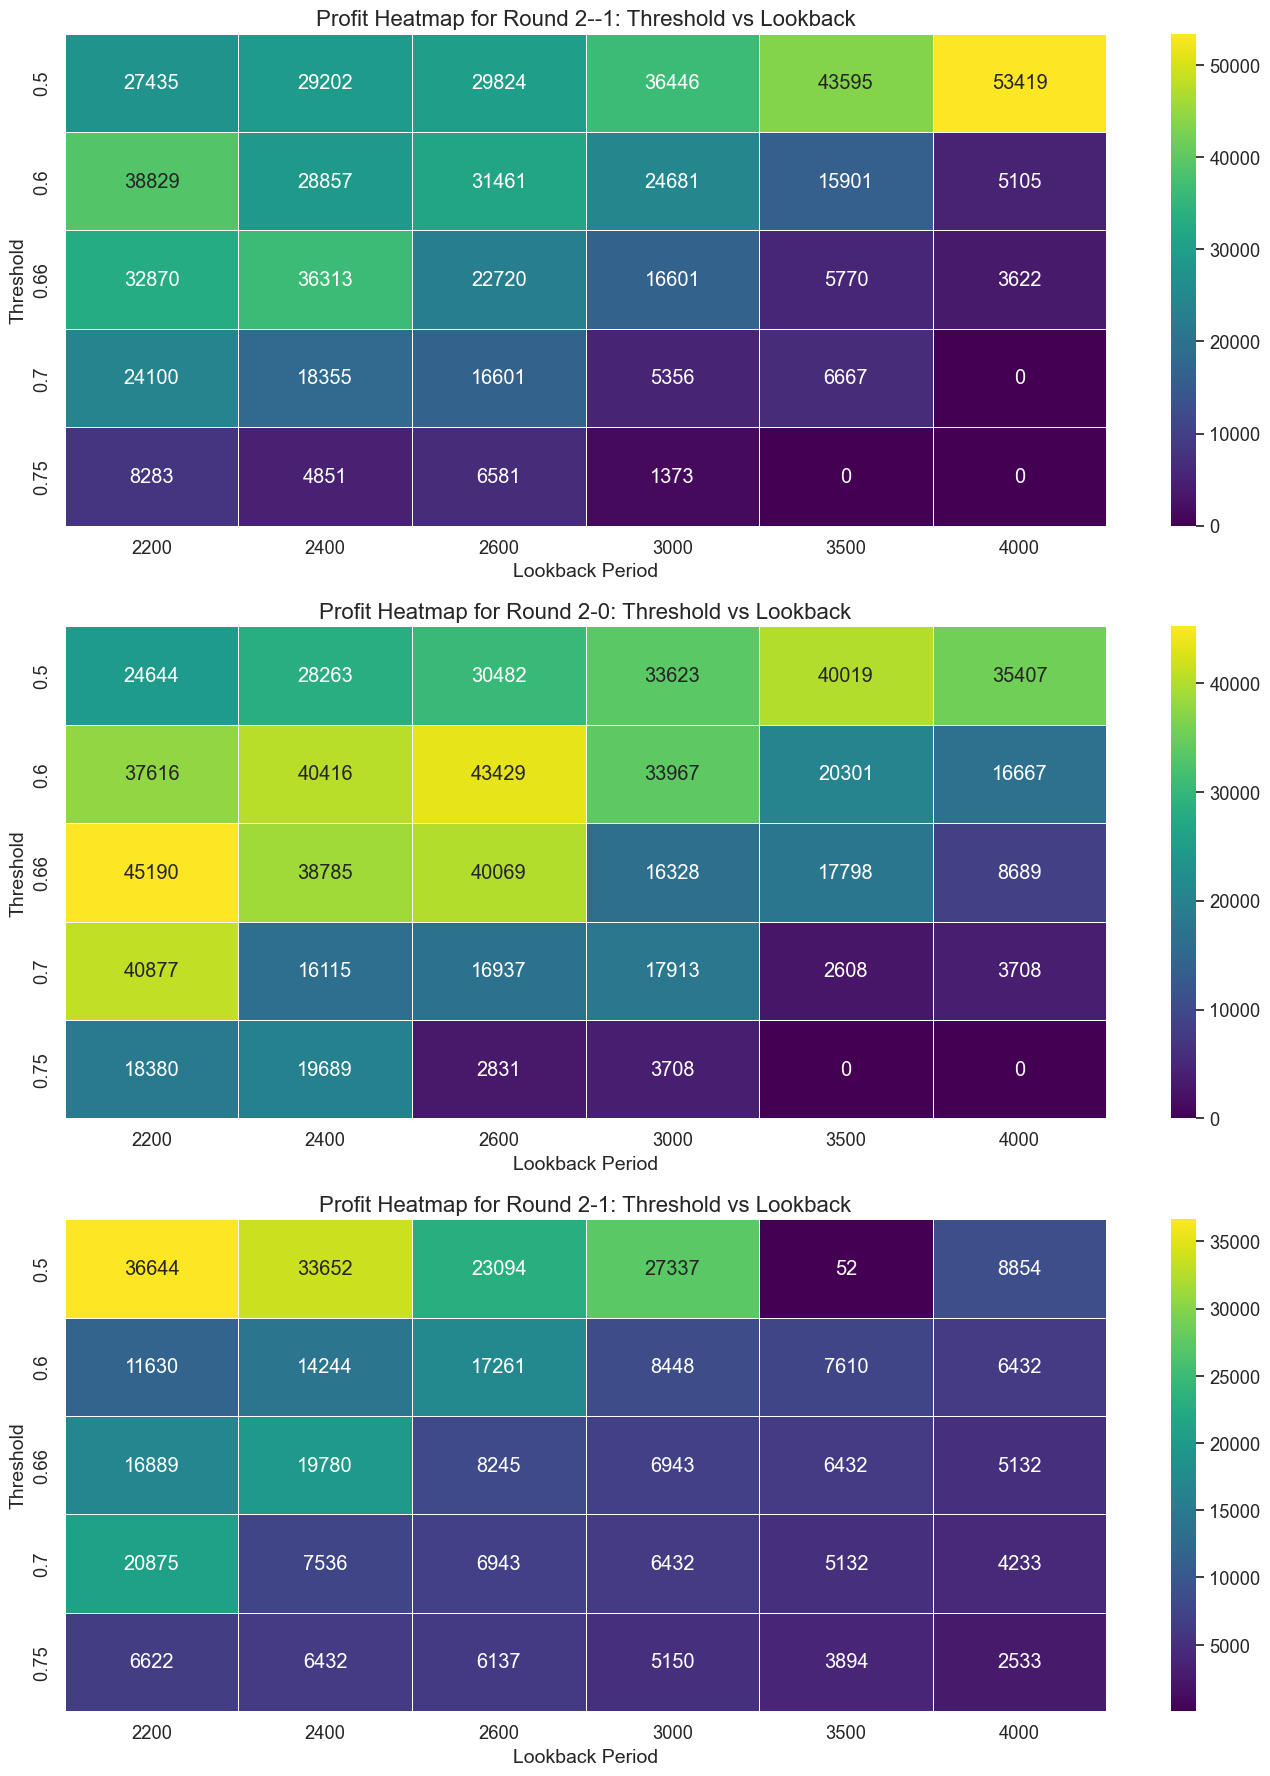

In [24]:
# Create separate heatmaps for each round
round_columns = [col for col in results_df.columns if col.startswith('2-') or col.startswith('2--')]

fig, axes = plt.subplots(len(round_columns), 1, figsize=(14, 6*len(round_columns)))

for i, round_col in enumerate(round_columns):
    # Create pivot table for this round
    pivot = results_df.pivot_table(
        index='threshold', 
        columns='lookback', 
        values=round_col,
        aggfunc='mean'
    )
    
    # Plot heatmap
    sns.heatmap(pivot, annot=True, fmt='.0f', cmap='viridis', linewidths=0.5, ax=axes[i])
    axes[i].set_title(f'Profit Heatmap for Round {round_col}: Threshold vs Lookback', fontsize=16)
    axes[i].set_xlabel('Lookback Period', fontsize=14)
    axes[i].set_ylabel('Threshold', fontsize=14)

plt.tight_layout()
plt.show()

### 2. Line Plots for Parameter Trends

Let's create line plots to see how each parameter affects the total profit when other parameters are fixed.

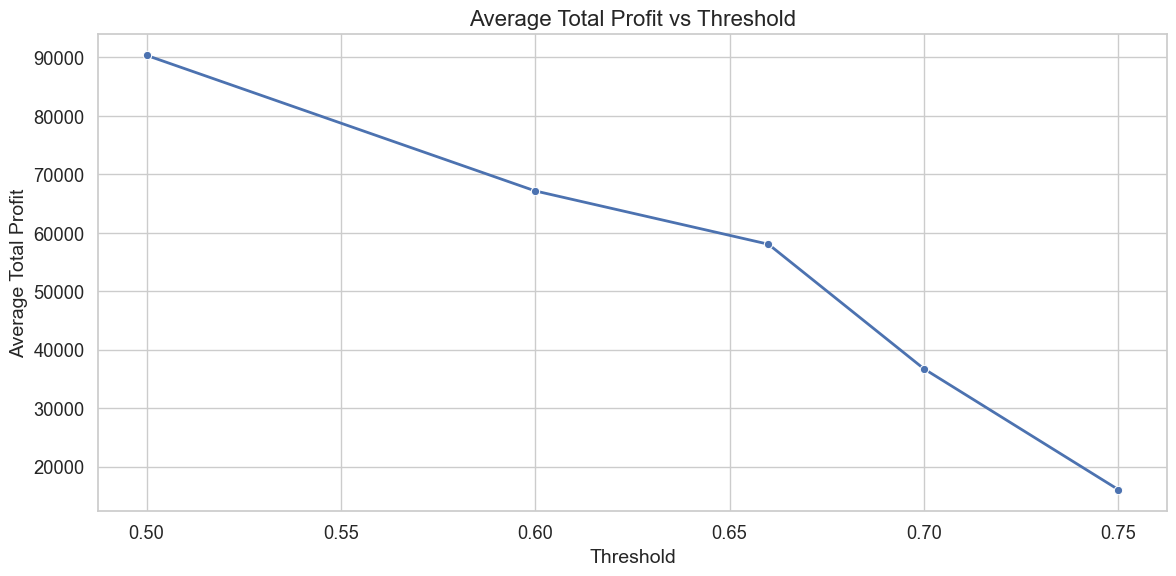

In [25]:
# Line plot for threshold vs total profit
threshold_profit = results_df.groupby('threshold')['total_profit'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='threshold', y='total_profit', data=threshold_profit, marker='o', linewidth=2)
plt.title('Average Total Profit vs Threshold', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Average Total Profit', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

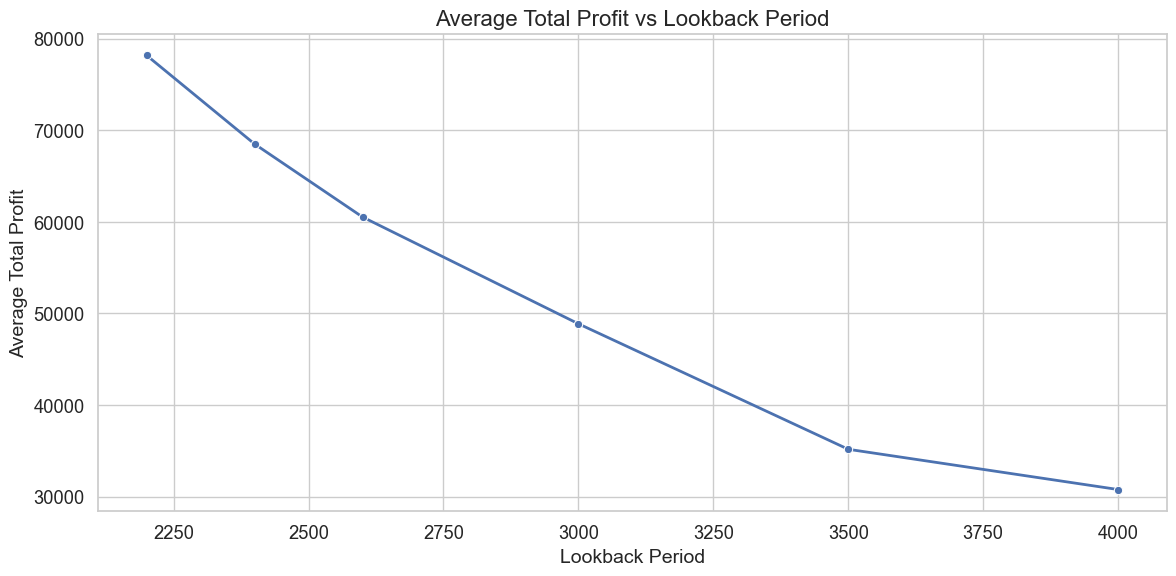

In [26]:
# Line plot for lookback vs total profit
lookback_profit = results_df.groupby('lookback')['total_profit'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='lookback', y='total_profit', data=lookback_profit, marker='o', linewidth=2)
plt.title('Average Total Profit vs Lookback Period', fontsize=16)
plt.xlabel('Lookback Period', fontsize=14)
plt.ylabel('Average Total Profit', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

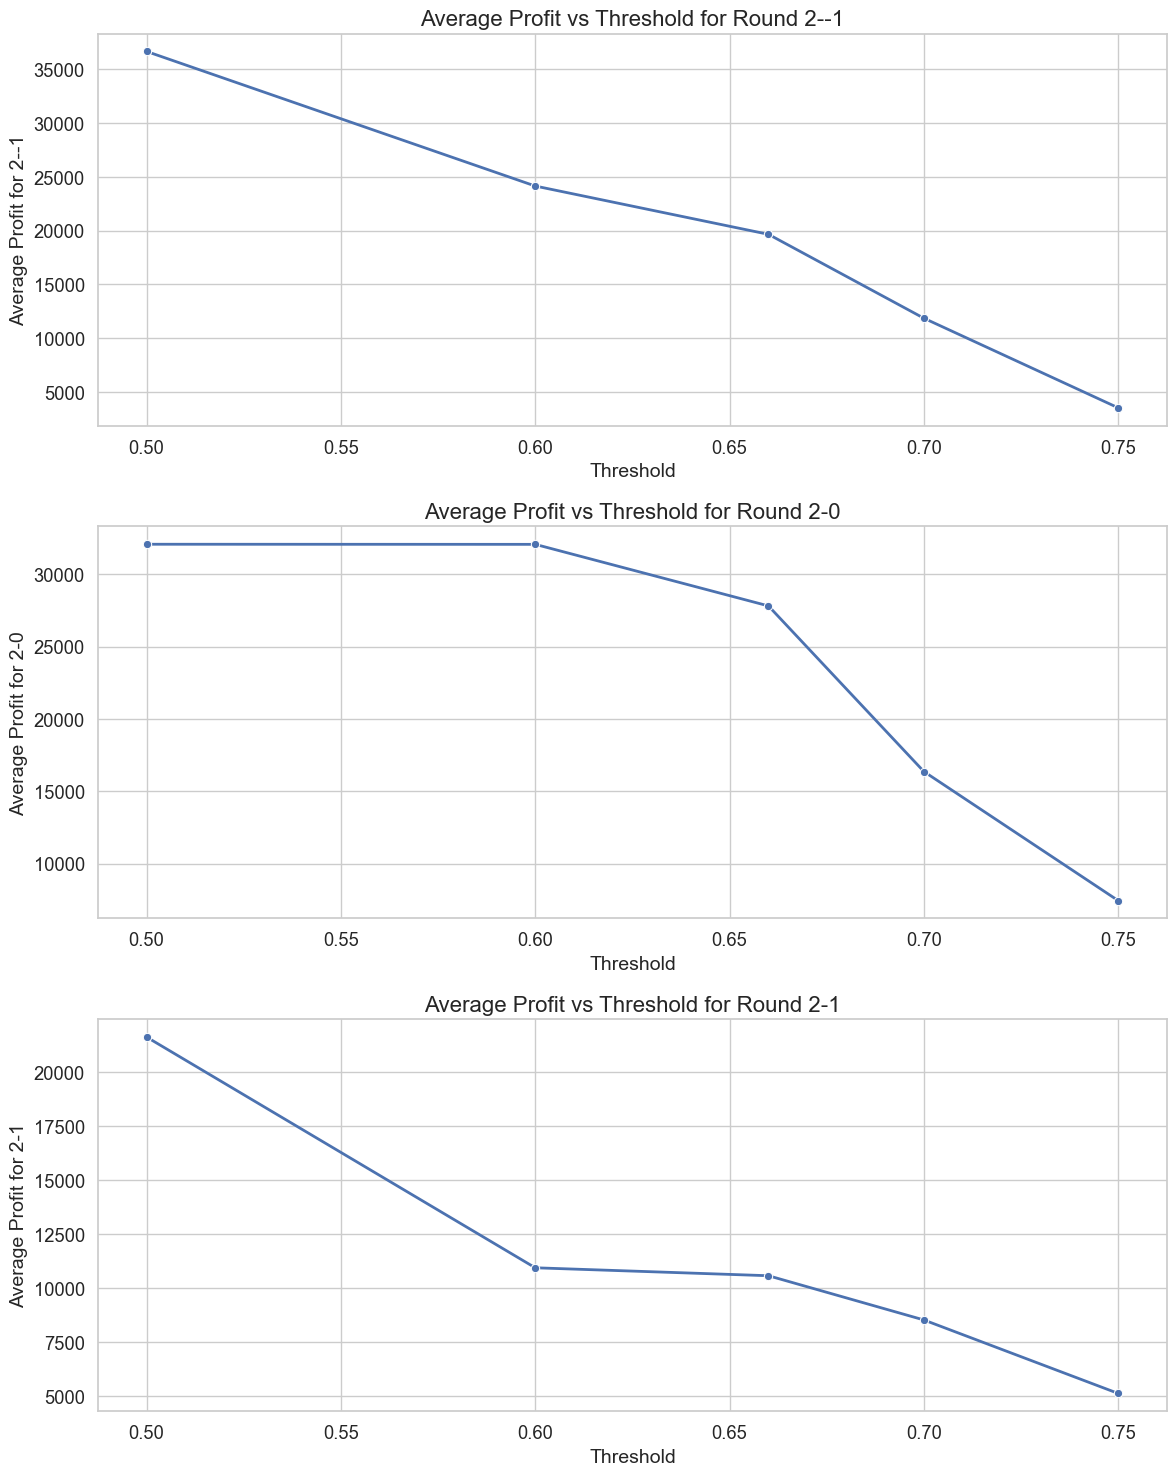

In [27]:
# Line plots for each round
fig, axes = plt.subplots(len(round_columns), 1, figsize=(12, 5*len(round_columns)))

for i, round_col in enumerate(round_columns):
    # Group by threshold
    threshold_round = results_df.groupby('threshold')[round_col].mean().reset_index()
    
    # Plot
    sns.lineplot(x='threshold', y=round_col, data=threshold_round, marker='o', linewidth=2, ax=axes[i])
    axes[i].set_title(f'Average Profit vs Threshold for Round {round_col}', fontsize=16)
    axes[i].set_xlabel('Threshold', fontsize=14)
    axes[i].set_ylabel(f'Average Profit for {round_col}', fontsize=14)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### 3. 3D Surface Plots

Let's create 3D surface plots to visualize the relationship between two parameters and the total profit.

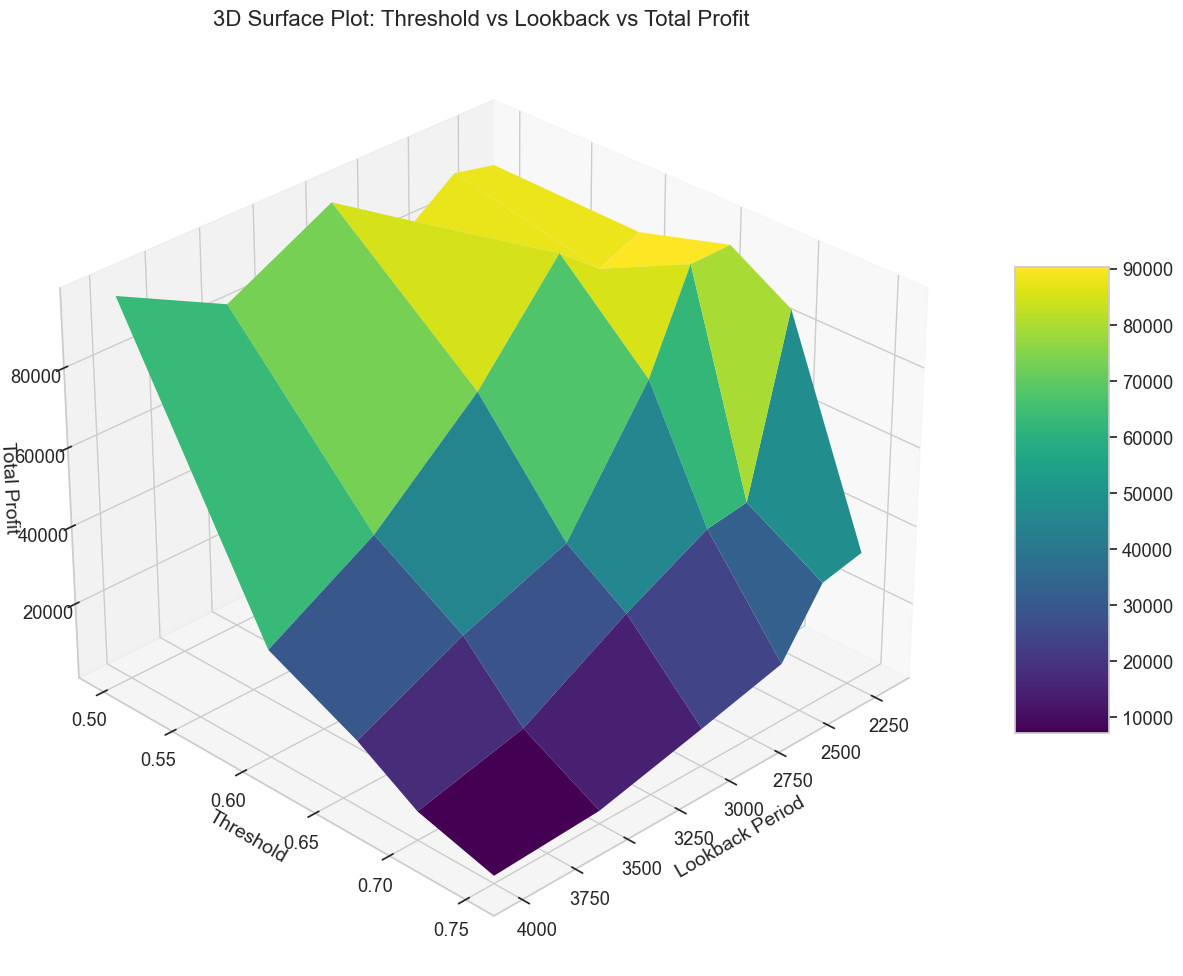

In [28]:
# 3D surface plot for threshold vs lookback vs total profit
# First, create a pivot table
pivot_3d = results_df.pivot_table(
    index='threshold', 
    columns='lookback', 
    values='total_profit',
    aggfunc='mean'
)

# Create meshgrid
x = pivot_3d.columns  # lookback values
y = pivot_3d.index    # threshold values
X, Y = np.meshgrid(x, y)
Z = pivot_3d.values   # profit values

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, linewidth=0, antialiased=True)

# Add color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Set labels and title
ax.set_xlabel('Lookback Period', fontsize=14)
ax.set_ylabel('Threshold', fontsize=14)
ax.set_zlabel('Total Profit', fontsize=14)
ax.set_title('3D Surface Plot: Threshold vs Lookback vs Total Profit', fontsize=16)

# Rotate the plot for better visualization
ax.view_init(30, 45)

plt.tight_layout()
plt.show()

### 4. Parameter Interaction Analysis

Let's analyze how parameters interact with each other to affect the total profit.

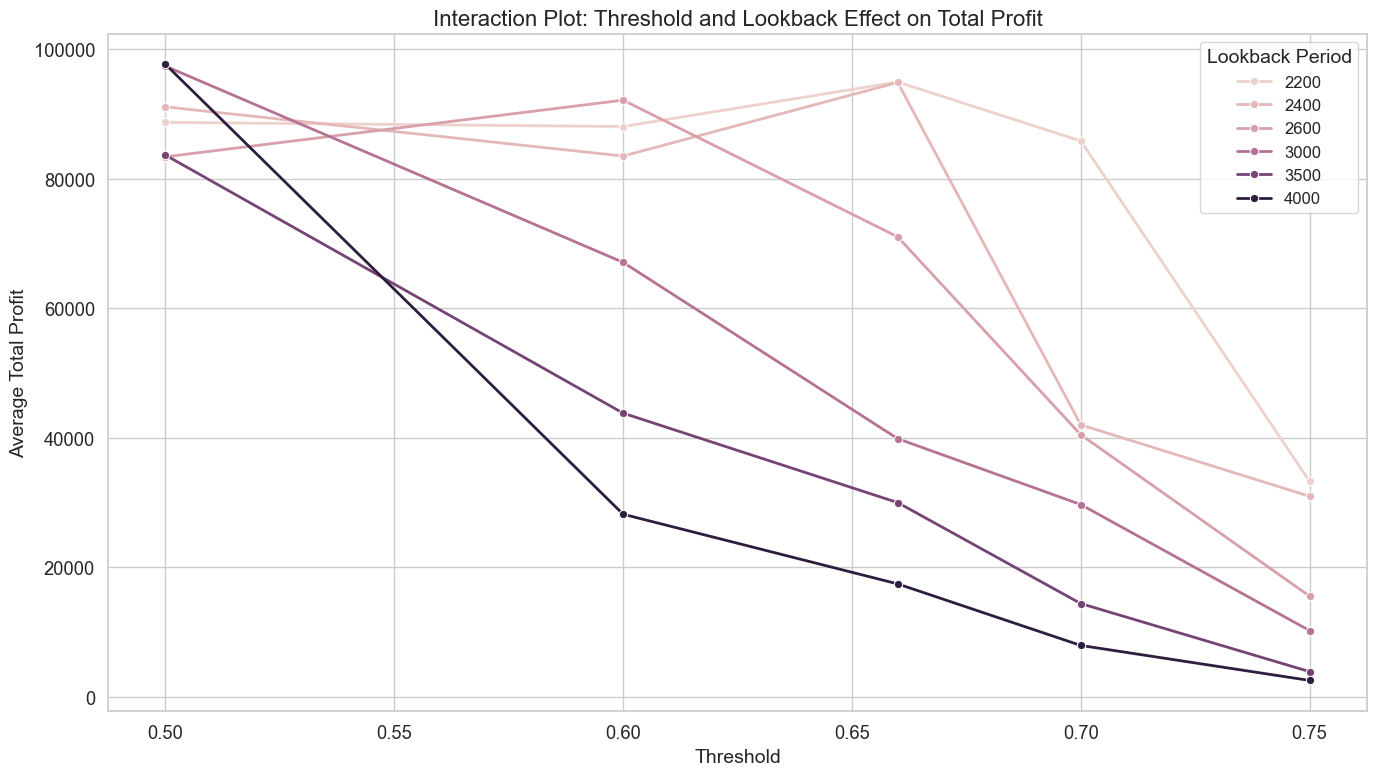

In [29]:
# Create interaction plots for threshold and lookback
plt.figure(figsize=(14, 8))

# Group by threshold and lookback
grouped_data = results_df.groupby(['threshold', 'lookback'])['total_profit'].mean().reset_index()

# Create the interaction plot
sns.lineplot(x='threshold', y='total_profit', hue='lookback', data=grouped_data, marker='o', linewidth=2)

plt.title('Interaction Plot: Threshold and Lookback Effect on Total Profit', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Average Total Profit', fontsize=14)
plt.grid(True)
plt.legend(title='Lookback Period', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

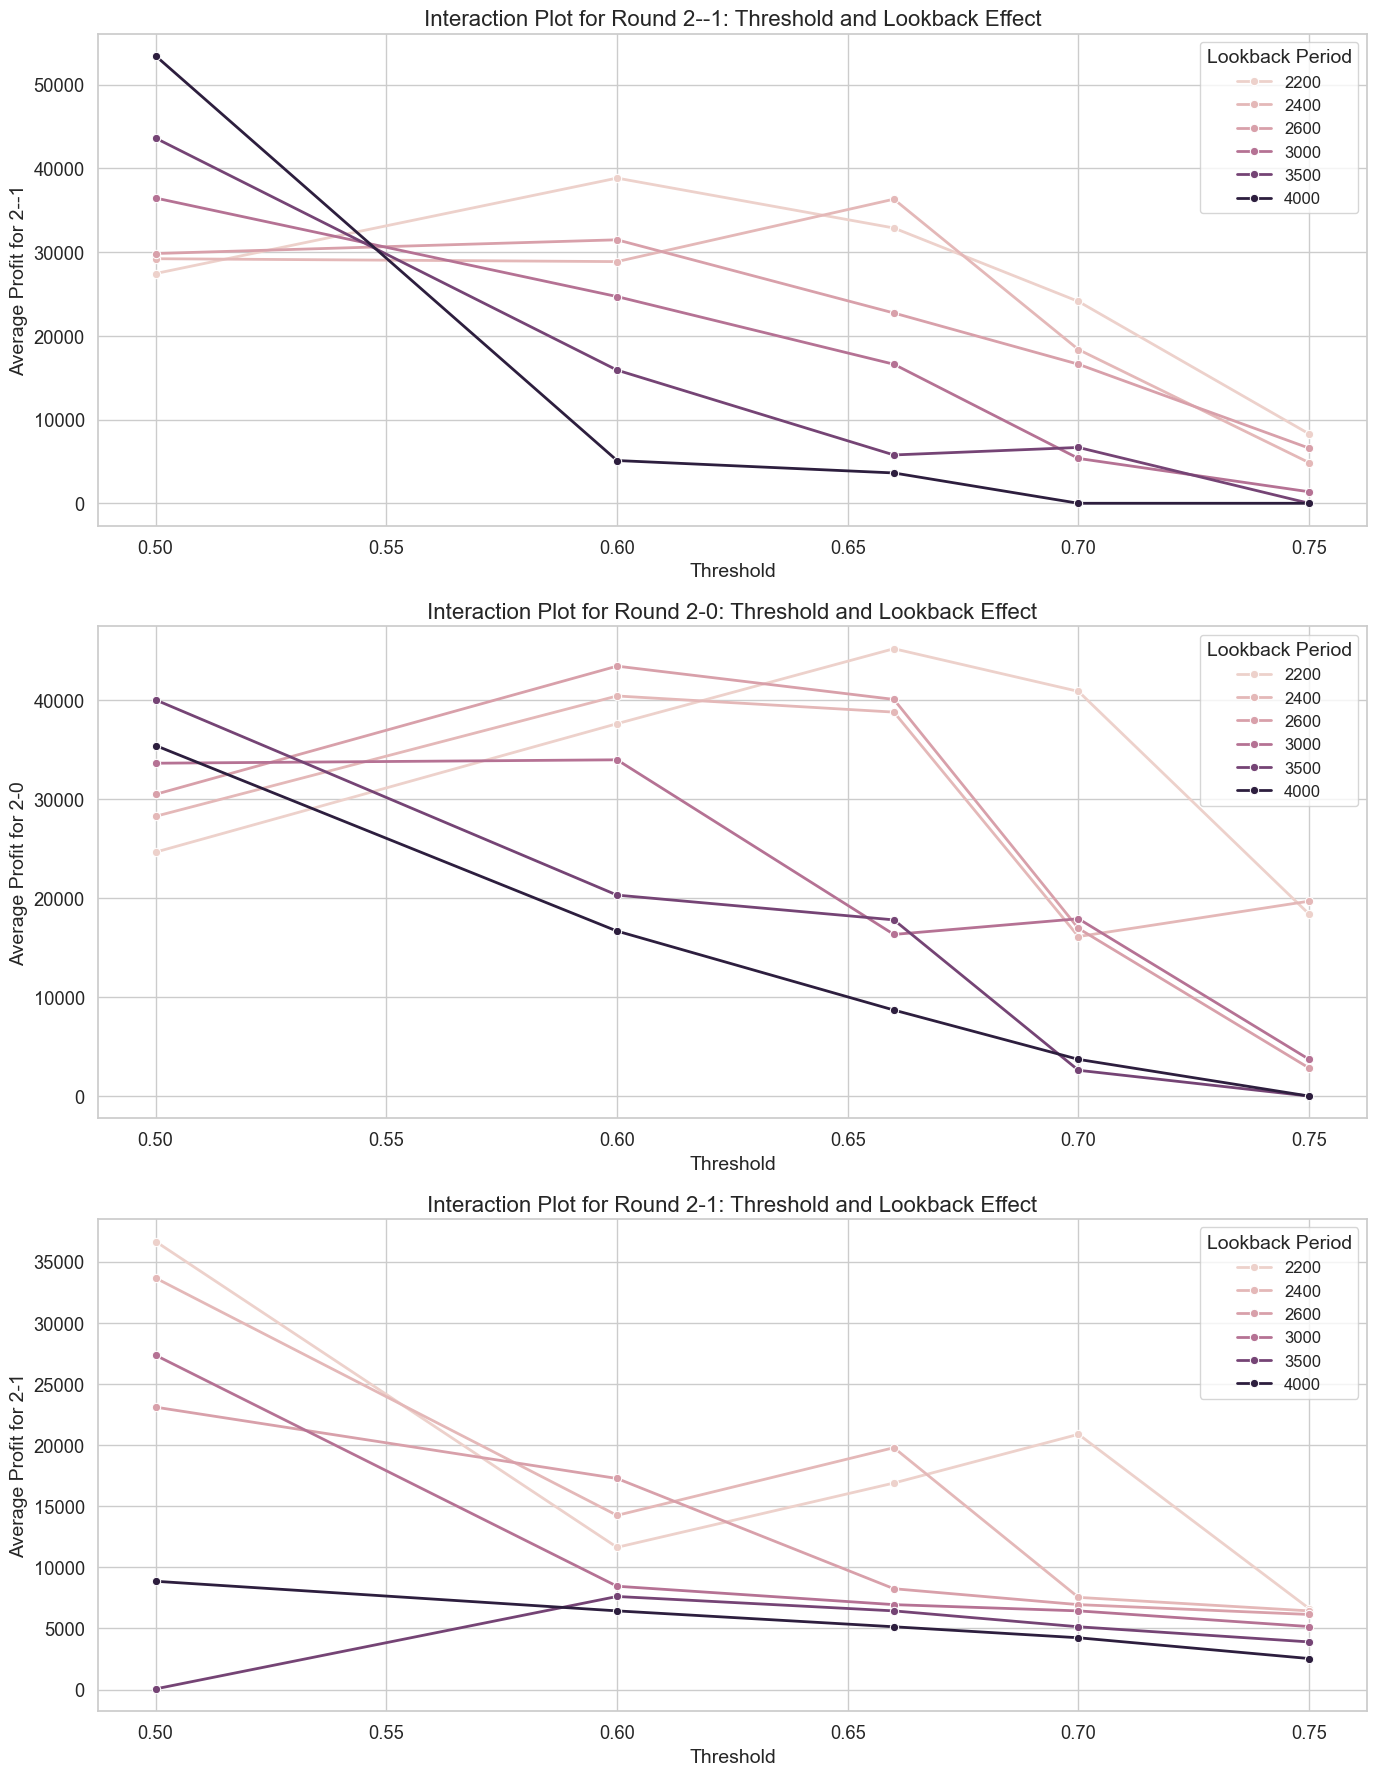

In [30]:
# Create interaction plots for each round
fig, axes = plt.subplots(len(round_columns), 1, figsize=(14, 6*len(round_columns)))

for i, round_col in enumerate(round_columns):
    # Group by threshold and lookback for this round
    grouped_round = results_df.groupby(['threshold', 'lookback'])[round_col].mean().reset_index()
    
    # Create the interaction plot
    sns.lineplot(x='threshold', y=round_col, hue='lookback', data=grouped_round, marker='o', linewidth=2, ax=axes[i])
    
    axes[i].set_title(f'Interaction Plot for Round {round_col}: Threshold and Lookback Effect', fontsize=16)
    axes[i].set_xlabel('Threshold', fontsize=14)
    axes[i].set_ylabel(f'Average Profit for {round_col}', fontsize=14)
    axes[i].grid(True)
    axes[i].legend(title='Lookback Period', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()

### 5. Parameter Optimization Analysis

Let's analyze the optimal parameters for each round and for the overall performance.

In [31]:
# Find the best parameters for total profit
best_overall = results_df.loc[results_df['total_profit'].idxmax()]

print(f"Best Overall Parameters:",
f"Threshold: {best_overall['threshold']}",
f"Lookback: {best_overall['lookback']}",
f"Max Position: {best_overall['max_position']}",
f"Price Adjustment: {best_overall['price_adjustment']}",
f"Total Profit: {best_overall['total_profit']}")

Best Overall Parameters: Threshold: 0.5 Lookback: 4000.0 Max Position: 30.0 Price Adjustment: 1.0 Total Profit: 97680.0


In [32]:
# Find the best parameters for each round
for round_col in round_columns:
    best_round = results_df.loc[results_df[round_col].idxmax()]
    
    print(f"""Best Parameters for Round {round_col}:
    Threshold: {best_round['threshold']}
    Lookback: {best_round['lookback']}
    Max Position: {best_round['max_position']}
    Price Adjustment: {best_round['price_adjustment']}
    Profit: {best_round[round_col]}""")

Best Parameters for Round 2--1:
    Threshold: 0.5
    Lookback: 4000.0
    Max Position: 30.0
    Price Adjustment: 1.0
    Profit: 53419.0
Best Parameters for Round 2-0:
    Threshold: 0.66
    Lookback: 2200.0
    Max Position: 30.0
    Price Adjustment: 1.0
    Profit: 45190.0
Best Parameters for Round 2-1:
    Threshold: 0.5
    Lookback: 2200.0
    Max Position: 30.0
    Price Adjustment: 1.0
    Profit: 36644.0


In [33]:
# Create a table of top 10 parameter combinations for each round
top_params = {}

# Overall top 10
top_params['Overall'] = results_df.sort_values('total_profit', ascending=False).head(10)

# Top 10 for each round
for round_col in round_columns:
    top_params[round_col] = results_df.sort_values(round_col, ascending=False).head(10)

# Display the top 10 for overall performance
print("Top 10 Parameter Combinations for Overall Performance:")
display(top_params['Overall'][['threshold', 'lookback', 'max_position', 'price_adjustment', 'total_profit']])

# Display the top 10 for each round
for round_col in round_columns:
    print(f"\nTop 10 Parameter Combinations for Round {round_col}:")
    display(top_params[round_col][['threshold', 'lookback', 'max_position', 'price_adjustment', round_col]])

Top 10 Parameter Combinations for Overall Performance:


,threshold,lookback,max_position,price_adjustment,total_profit
0,0.50,4000,30,1,97680
1,0.50,3000,30,1,97406
2,0.66,2200,30,1,94949
3,0.66,2400,30,1,94878
4,0.60,2600,30,1,92151
5,0.50,2400,30,1,91117
6,0.50,2200,30,1,88723
7,0.60,2200,30,1,88075
8,0.70,2200,30,1,85852
9,0.50,3500,30,1,83666



Top 10 Parameter Combinations for Round 2--1:


,threshold,lookback,max_position,price_adjustment,2--1
0,0.50,4000,30,1,53419
9,0.50,3500,30,1,43595
7,0.60,2200,30,1,38829
1,0.50,3000,30,1,36446
3,0.66,2400,30,1,36313
2,0.66,2200,30,1,32870
4,0.60,2600,30,1,31461
11,0.50,2600,30,1,29824
5,0.50,2400,30,1,29202
10,0.60,2400,30,1,28857



Top 10 Parameter Combinations for Round 2-0:


,threshold,lookback,max_position,price_adjustment,2-0
2,0.66,2200,30,1,45190
4,0.60,2600,30,1,43429
8,0.70,2200,30,1,40877
10,0.60,2400,30,1,40416
12,0.66,2600,30,1,40069
9,0.50,3500,30,1,40019
3,0.66,2400,30,1,38785
7,0.60,2200,30,1,37616
0,0.50,4000,30,1,35407
13,0.60,3000,30,1,33967



Top 10 Parameter Combinations for Round 2-1:


,threshold,lookback,max_position,price_adjustment,2-1
6,0.50,2200,30,1,36644
5,0.50,2400,30,1,33652
1,0.50,3000,30,1,27337
11,0.50,2600,30,1,23094
8,0.70,2200,30,1,20875
3,0.66,2400,30,1,19780
4,0.60,2600,30,1,17261
2,0.66,2200,30,1,16889
10,0.60,2400,30,1,14244
7,0.60,2200,30,1,11630


### 6. Parameter Consistency Analysis

Let's analyze how consistent the optimal parameters are across different rounds.

Consistency score for threshold: 26.67%
Consistency score for lookback: 53.33%
Consistency score for max_position: 20.00%
Consistency score for price_adjustment: 20.00%


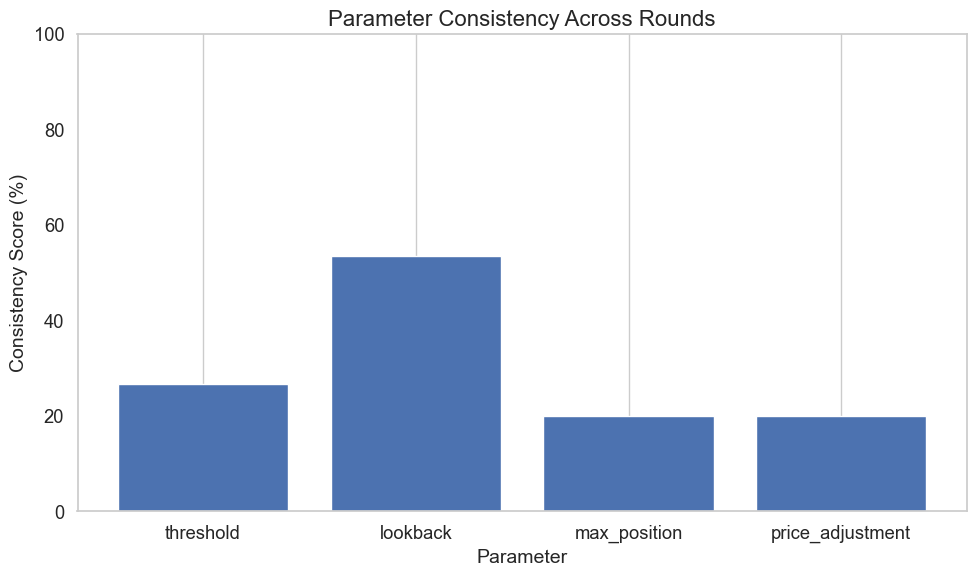

In [34]:
# Create a function to calculate the consistency score for a parameter
def calculate_consistency(param_name, top_n=5):
    # Get the top N parameter values for each round
    top_values = {}
    for round_col in round_columns:
        top_values[round_col] = top_params[round_col][param_name].values[:top_n]
    
    # Calculate the overlap between rounds
    overlap_count = 0
    total_comparisons = 0
    
    for i, round1 in enumerate(round_columns):
        for j, round2 in enumerate(round_columns):
            if i < j:  # Only compare each pair once
                overlap = set(top_values[round1]).intersection(set(top_values[round2]))
                overlap_count += len(overlap)
                total_comparisons += 1
    
    # Calculate consistency score (average overlap percentage)
    if total_comparisons > 0:
        consistency_score = (overlap_count / (top_n * total_comparisons)) * 100
    else:
        consistency_score = 0
    
    return consistency_score

# Calculate consistency scores for each parameter
param_names = ['threshold', 'lookback', 'max_position', 'price_adjustment']
consistency_scores = {}

for param in param_names:
    consistency_scores[param] = calculate_consistency(param)
    print(f"Consistency score for {param}: {consistency_scores[param]:.2f}%")

# Create a bar chart of consistency scores
plt.figure(figsize=(10, 6))
plt.bar(consistency_scores.keys(), consistency_scores.values())
plt.title('Parameter Consistency Across Rounds', fontsize=16)
plt.xlabel('Parameter', fontsize=14)
plt.ylabel('Consistency Score (%)', fontsize=14)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Conclusion and Recommendations

Based on the analysis of the grid search results, we can make the following observations and recommendations:

In [35]:
# Calculate the most common values and their counts from the top 10 results
top_10_results = results_df.sort_values('total_profit', ascending=False).head(10)

# For threshold
threshold_counts = top_10_results['threshold'].value_counts()
most_common_threshold = threshold_counts.index[0]

# For lookback
lookback_counts = top_10_results['lookback'].value_counts()
most_common_lookback = lookback_counts.index[0]

# For max_position
max_position_counts = top_10_results['max_position'].value_counts()
most_common_max_position = max_position_counts.index[0]

# For price_adjustment
price_adjustment_counts = top_10_results['price_adjustment'].value_counts()
most_common_price_adjustment = price_adjustment_counts.index[0]

# Print the results
print("Recommended Parameter Values Based on Analysis:")
print(f"1. Threshold: {most_common_threshold} (appears in {threshold_counts[most_common_threshold]} of top 10 combinations)")
print(f"2. Lookback: {most_common_lookback} (appears in {lookback_counts[most_common_lookback]} of top 10 combinations)")
print(f"3. Max Position: {most_common_max_position} (appears in {max_position_counts[most_common_max_position]} of top 10 combinations)")
print(f"4. Price Adjustment: {most_common_price_adjustment} (appears in {price_adjustment_counts[most_common_price_adjustment]} of top 10 combinations)")

print("\nObservations:")

# Rest of the code remains the same...

print("\nObservations:")

# Check if the best parameters are consistent across rounds
if all(consistency_scores[param] > 50 for param in param_names):
    print("- The optimal parameters are relatively consistent across different rounds, suggesting that these parameters are robust.")
else:
    print("- The optimal parameters vary across different rounds, suggesting that different market conditions may require different parameter settings.")

# Check if there's a clear trend in the threshold parameter
threshold_trend = threshold_profit.sort_values('threshold')
if threshold_trend['total_profit'].iloc[-1] > threshold_trend['total_profit'].iloc[0]:
    print("- Higher threshold values tend to perform better overall.")
elif threshold_trend['total_profit'].iloc[-1] < threshold_trend['total_profit'].iloc[0]:
    print("- Lower threshold values tend to perform better overall.")
else:
    print("- There is no clear trend in performance with respect to threshold values.")

# Check if there's a clear trend in the lookback parameter
lookback_trend = lookback_profit.sort_values('lookback')
if lookback_trend['total_profit'].iloc[-1] > lookback_trend['total_profit'].iloc[0]:
    print("- Longer lookback periods tend to perform better overall.")
elif lookback_trend['total_profit'].iloc[-1] < lookback_trend['total_profit'].iloc[0]:
    print("- Shorter lookback periods tend to perform better overall.")
else:
    print("- There is no clear trend in performance with respect to lookback periods.")

print("\nFinal Recommendation:")
print(f"""Based on the grid search results, the recommended parameter values for the CMMA difference trader are:
    Threshold: {best_overall['threshold']}
    Lookback: {best_overall['lookback']}
    Max Position: {best_overall['max_position']}
    Price Adjustment: {best_overall['price_adjustment']}""")

Recommended Parameter Values Based on Analysis:
1. Threshold: 0.5 (appears in 5 of top 10 combinations)
2. Lookback: 2200 (appears in 4 of top 10 combinations)
3. Max Position: 30 (appears in 10 of top 10 combinations)
4. Price Adjustment: 1 (appears in 10 of top 10 combinations)

Observations:

Observations:
- The optimal parameters vary across different rounds, suggesting that different market conditions may require different parameter settings.
- Lower threshold values tend to perform better overall.
- Shorter lookback periods tend to perform better overall.

Final Recommendation:
Based on the grid search results, the recommended parameter values for the CMMA difference trader are:
    Threshold: 0.5
    Lookback: 4000.0
    Max Position: 30.0
    Price Adjustment: 1.0
